In [180]:
import sqlite3 as sq
import pandas as pd
import seaborn as sns
import numpy

pd.set_option("display.max_rows", None, "display.max_columns", None)
sq_file = 'lahman2014.sqlite'
conn = sq.connect(sq_file)

In [181]:
# Part 1 Problem 1 
# Using SQL to compute a relation to calculate win percentage as well as extract data
salary_query = "SELECT Teams.teamID, Teams.yearID, franchID, W, G, 100.0 *W/G AS 'W_percentage', sum(salary) AS 'total_payroll' \
FROM Teams INNER JOIN Salaries ON Salaries.yearID = Teams.yearID AND Salaries.teamID = Teams.teamID \
GROUP BY Teams.yearID, Teams.teamID"
team_salaries = pd.read_sql(salary_query, conn)
display(team_salaries)




,teamID,yearID,franchID,W,G,W_percentage,total_payroll
0,ATL,1985,ATL,66,162,40.740741,14807000.0
1,BAL,1985,BAL,83,161,51.552795,11560712.0
2,BOS,1985,BOS,81,163,49.693252,10897560.0
3,CAL,1985,ANA,90,162,55.555556,14427894.0
4,CHA,1985,CHW,85,163,52.147239,9846178.0
5,CHN,1985,CHC,77,162,47.530864,12702917.0
6,CIN,1985,CIN,89,162,54.938272,8359917.0
7,CLE,1985,CLE,60,162,37.037037,6551666.0
8,DET,1985,DET,84,161,52.173913,10348143.0
9,HOU,1985,HOU,83,162,51.234568,9993051.0


total payroll = x * 100M


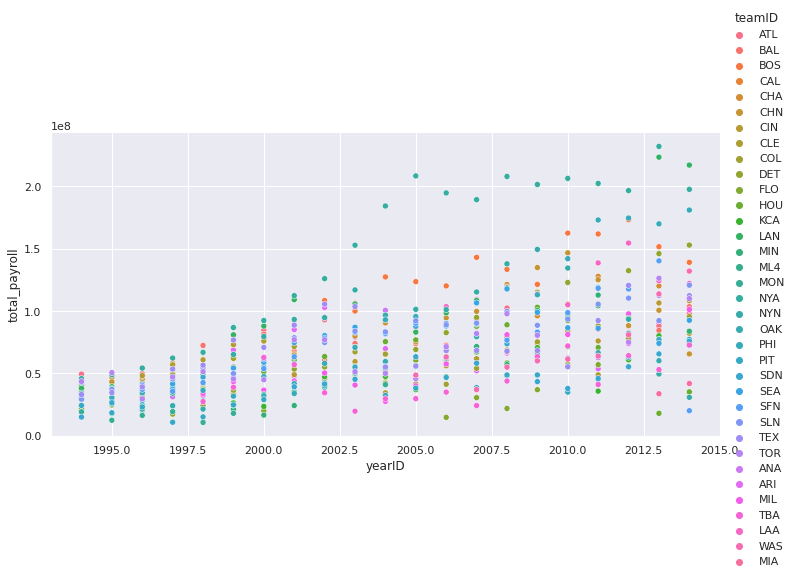

In [182]:
# Part 2 Problem 2
# Creating a new dataframe for the rows with year after 1994 
# (idx 0-236 is the locations of the years 1993 and below).
i = 0
lst = []
while i < 236:
    lst.append(i)
    i+=1
past1994 = team_salaries.drop(lst)
# Creating the plot 
# x axis = year and y axis = the total payroll spent that year accross all teams
sns.set_theme()
sns.relplot(
    data=past1994,
    x="yearID", y="total_payroll", hue="teamID", aspect=2
)
print("total payroll = x * 100M")



In [183]:
# Part 2 Question 1
# The distribution of payrolls is much more spreadout in 2014 than in 1995
# Over time the spread grew larger between the lowest spending team and highest
# The spread started with the top spending team, at the end of the 90s, greatly increasing their spending up to 2005
# 2005 is when the highest spending team was outspending the other teams the most. 
# Over the next 10 years, the others teams started to increase their spending \
# (The cluster of points increase and are more spread out (Average Spending Increase Shown Below))
# 2013 is when a team spent the most over the 20 year period

# Overall what I see from the data is the highest spending team led the charge and the other teams followed
# An assumption I could have is the higher spending team obtained success so the other teams followed
# hoping for the same results.

total payroll = x * 100M


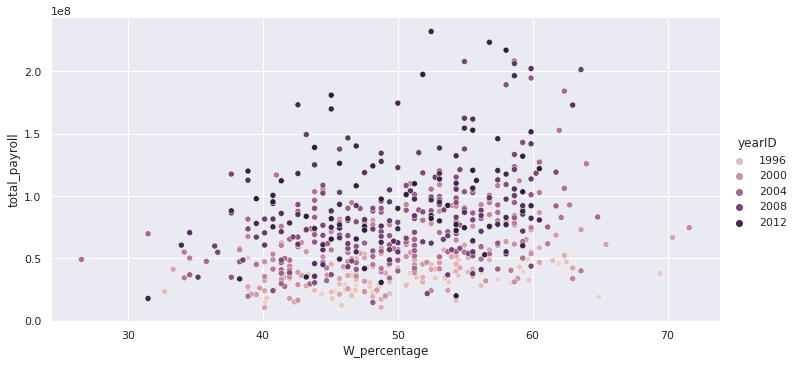

In [184]:
# Part 2 Problem 3
# The plot below shows the increase in spending from 1996 to 2012 
# Based on the plot it appears teams with a >= .50 Win_Percentage outspent the teams with worst records \
# draw a verticle line at 50 (.50) and looking at both sides of the graph shows this
# I can assume spending contributes to winning more games but some teams were able to have good records 
# and spend less

sns.set_theme()
sns.relplot(
    data=past1994,
    x="W_percentage", y="total_payroll", hue="yearID", aspect=2
)
print("total payroll = x * 100M")

In [185]:
# Part 2 Problem 4
# Below are the five time periods of the data
# (1984.971, 1990.8]
# (1990.8, 1996.6]
# (1996.6, 2002.4]
# (2002.4, 2008.2]
# (2008.2, 2014.0]
# This function prints a graph and chart that shows how the winning percentage correlates with the total payroll 
# within a range provided in the year argument 
def func(year):
    df2 = team_salaries.sort_values(by=['teamID']) 
    df2['bin'] = pd.cut(df2['yearID'],5)

    id_lst = df2['teamID'].tolist()
    pay_lst = df2['total_payroll'].tolist()
    w_lst = df2['W_percentage'].tolist()
    year_lst = df2['yearID'].tolist()
    new_id_lst = []
    new_pay_lst = []
    new_year_lst = []
    new_w_lst = []

    count = 0
    for items in df2['bin']:
        if str(items) == year:
            new_id_lst.append(id_lst[count])
            new_pay_lst.append(pay_lst[count])
            new_year_lst.append(year_lst[count])
            new_w_lst.append(w_lst[count])
        count+=1

    count = 0
    divisor = 1
    idx = -1
    pay_lst = []
    w_lst = []
    id_lst = []
    for item in new_id_lst:
        if item not in id_lst:
            id_lst.append(item)
            pay_lst.append(float(new_pay_lst[count]))
            w_lst.append(float(new_w_lst[count]))
            if count > 0:
                pay_lst[idx] = pay_lst[idx]/divisor
                w_lst[idx] = w_lst[idx]/divisor
                divisor = 1
            idx += 1
        else:
            pay_lst[idx] += new_pay_lst[count]
            w_lst[idx] += new_w_lst[count]
            divisor += 1
            if count == len(new_id_lst) -1:
                pay_lst[idx] = pay_lst[idx]/divisor
                w_lst[idx] = w_lst[idx]/divisor

        count += 1
    new_df2 = pd.DataFrame(data=id_lst, columns={'teamID'})
    new_df2['avg_payroll'] = pay_lst
    new_df2['avg_W_percentage'] = w_lst
    display(new_df2)

    sns.set_theme()
    sns.relplot(
        data=new_df2,
        x="avg_payroll", y="avg_W_percentage", hue="teamID", aspect=1.5
    )


,teamID,avg_payroll,avg_W_percentage
0,ATL,1.447506e+07,40.220379
1,BAL,1.165826e+07,45.403599
2,BOS,1.456336e+07,52.890240
3,CAL,1.507731e+07,51.748971
4,CHA,9.008958e+06,48.183960
5,CHN,1.360505e+07,48.443895
6,CIN,1.064637e+07,52.730491
7,CLE,9.232153e+06,44.494307
8,DET,1.340266e+07,50.979603
9,HOU,1.302006e+07,51.234568


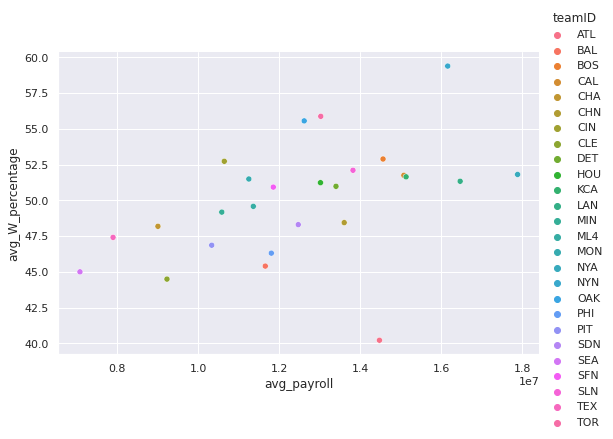

In [186]:
# Correlation between average win percentage and total payroll for the years 1985 - 1990
func('(1984.971, 1990.8]')

,teamID,avg_payroll,avg_W_percentage
0,ATL,4.016462e+07,60.687405
1,BAL,3.461313e+07,51.384786
2,BOS,3.810113e+07,50.907363
3,CAL,3.025251e+07,46.068756
4,CHA,3.634355e+07,53.912090
5,CHN,3.187770e+07,48.129625
6,CIN,3.895822e+07,52.119230
7,CLE,2.701746e+07,53.059092
8,COL,2.714384e+07,47.840990
9,DET,3.187333e+07,45.181159


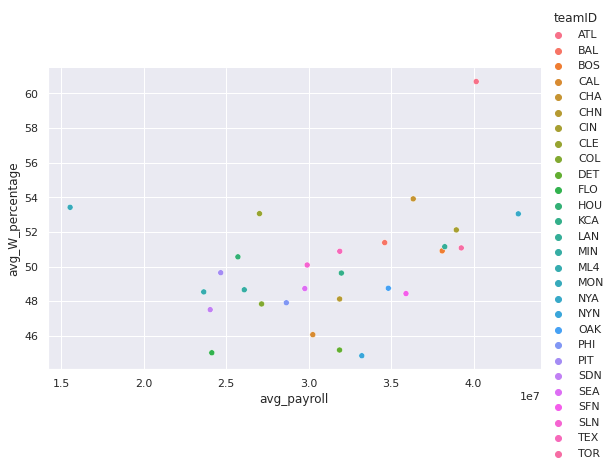

In [187]:
# Correlation between average win percentage and total payroll for the years 1990 - 1996
func('(1990.8, 1996.6]')

,teamID,avg_payroll,avg_W_percentage
0,ANA,4.808761e+07,50.925926
1,ARI,7.399637e+07,54.320988
2,ATL,7.599148e+07,61.175651
3,BAL,7.016973e+07,47.222222
4,BOS,7.669258e+07,53.961864
5,CHA,4.592250e+07,50.823673
6,CHN,5.938039e+07,45.725088
7,CIN,4.127323e+07,49.062713
8,CLE,7.308722e+07,54.273062
9,COL,5.758062e+07,47.325103


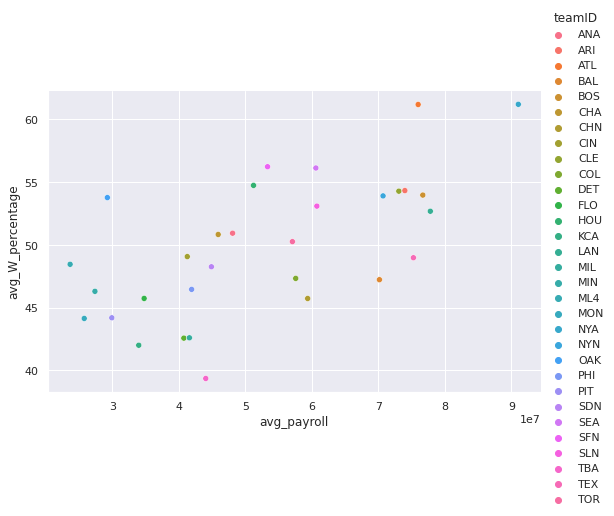

In [188]:
# Correlation between average win percentage and total payroll for the years 1996 - 2002
func('(1996.6, 2002.4]')

,teamID,avg_payroll,avg_W_percentage
0,ANA,8.978317e+07,52.160494
1,ARI,6.512023e+07,47.325103
2,ATL,9.378281e+07,53.703704
3,BAL,7.206197e+07,44.237323
4,BOS,1.245444e+08,58.127572
5,CHA,8.733539e+07,53.338888
6,CHN,9.498366e+07,51.913836
7,CIN,6.190262e+07,45.632937
8,CLE,5.351358e+07,51.028807
9,COL,5.739889e+07,46.136610


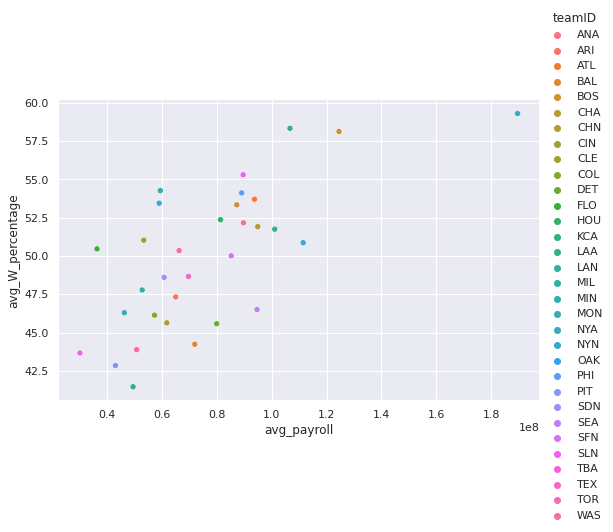

In [189]:
# Correlation between average win percentage and total payroll for the years 2002 - 2008
func('(2002.4, 2008.2]')

,teamID,avg_payroll,avg_W_percentage
0,ARI,7.487867e+07,46.810700
1,ATL,8.941050e+07,55.041152
2,BAL,8.319692e+07,48.662551
3,BOS,1.515487e+08,52.572016
4,CHA,1.047005e+08,48.045267
5,CHN,1.101254e+08,44.188840
6,CIN,8.634879e+07,52.572016
7,CLE,7.131895e+07,47.222222
8,COL,8.257637e+07,46.502058
9,DET,1.291326e+08,54.781110


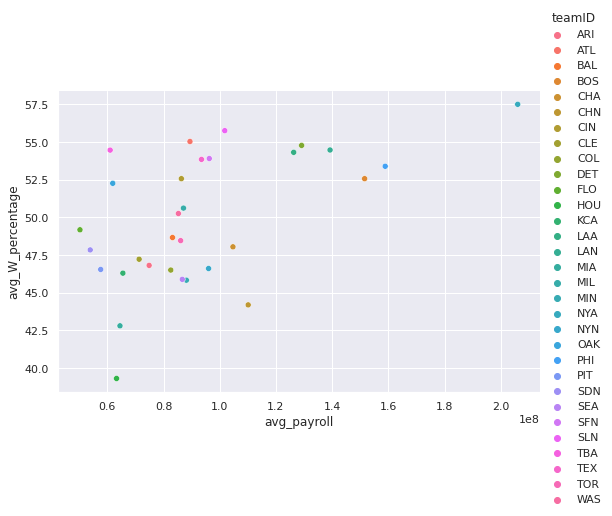

In [190]:
# Correlation between average win percentage and total payroll for the years 2008 - 2014
func('(2008.2, 2014.0]')

In [191]:
# Part 2 Question 2
# That pay rolls are increasing accross these time periods, for each graph the avg_payroll units are shifting right
# The team with the Id NYA have succeeded the most in paying for wins. 
# They are the outlier in the top right corner of graphs 1996-2002 and above   
# The oakland A's are a very efficent spending team. They have managed to spend less than most teams with their record
# Looking at the 2002.4 - 2008.2 graph "OAK (5.911490e+07, 53.442988)" 
# They spent less than most team but still won 53% of games

In [192]:
# Part 3 Problem 5
# Creates a new variable in dataset that standardizes payroll conditioned on year.
df3 = team_salaries.sort_values(by=['yearID']) 
df3['bin'] = pd.cut(df3['yearID'],5)
pay_lst = df3['total_payroll'].tolist()
sd_dict = {}
ap_dict = {}
count = 0
for items in df3['yearID']:
    if str(items) not in sd_dict:
        sd_dict[str(items)] = [pay_lst[count]]
        ap_dict[str(items)] = [pay_lst[count]]
    else:
        sd_dict[str(items)].append(pay_lst[count])
        ap_dict[str(items)].append(pay_lst[count])
    count += 1

for key in sd_dict:
    sd_dict[key] = numpy.std(sd_dict[key])
    ap_dict[key] = numpy.mean(sd_dict[key])
    

In [193]:
id_lst = df3['teamID'].tolist()
pay_lst = df3['total_payroll'].tolist()
w_lst = df3['W_percentage'].tolist()
year_lst = df3['yearID'].tolist()
new_id_lst = []
new_pay_lst = []
new_year_lst = []
new_w_lst = []

count = 0
for items in df3['bin']:
    new_id_lst.append(id_lst[count])
    new_pay_lst.append(pay_lst[count])
    new_year_lst.append(year_lst[count])
    new_w_lst.append(w_lst[count])
    count+=1

id_lst = []
stand_payroll = []
count = 0
for items in new_id_lst:
    key = str(new_year_lst[count])
    value = (new_pay_lst[count] - ap_dict[key])
    stand_payroll.append(value/sd_dict[key])
    count += 1
    
new_df2 = pd.DataFrame(data=new_id_lst, columns={'teamID'})
new_df2['total_payroll'] = new_pay_lst
new_df2['yearID'] = new_year_lst
new_df2['W_percentage'] = new_w_lst
new_df2['stand_payroll'] = stand_payroll
new_df2['bin'] = df3['bin']


In [194]:
# Result of Part 3 Problem 5
display(new_df2)

,teamID,total_payroll,yearID,W_percentage,stand_payroll,bin
0,ATL,14807000.0,1985,40.740741,5.111364,"(1984.971, 1990.8]"
1,TOR,8812550.0,1985,61.490683,2.637246,"(1984.971, 1990.8]"
2,TEX,7676500.0,1985,38.509317,2.168359,"(1984.971, 1990.8]"
3,SLN,11817083.0,1985,62.345679,3.877321,"(1984.971, 1990.8]"
4,SFN,8221714.0,1985,38.271605,2.393388,"(1984.971, 1990.8]"
5,SEA,4613000.0,1985,45.679012,0.903946,"(1984.971, 1990.8]"
6,SDN,11036583.0,1985,51.234568,3.555182,"(1984.971, 1990.8]"
7,PHI,10124966.0,1985,46.296296,3.178926,"(1984.971, 1990.8]"
8,OAK,9058606.0,1985,47.530864,2.738802,"(1984.971, 1990.8]"
9,NYN,10834762.0,1985,60.493827,3.471883,"(1984.971, 1990.8]"


In [195]:
# Part 3 Problem 6
# (1984.971, 1990.8]
# (1990.8, 1996.6]
# (1996.6, 2002.4]
# (2002.4, 2008.2]
# (2008.2, 2014.0]
# Same plots as problem 4 but this time i used the standardized payroll variable
def func2(year):
    id_lst = new_df2['teamID'].tolist()
    sp_lst = new_df2['stand_payroll'].tolist()
    w_lst = new_df2['W_percentage'].tolist()
    new_id_lst = []
    new_sp_lst = []
    new_w_lst = []
    count = 0
    for items in new_df2['bin']:
        if str(items) == year:
            new_id_lst.append(id_lst[count])
            new_sp_lst.append(sp_lst[count])
            new_w_lst.append(w_lst[count])
        count += 1

    id_dict = {}
    w_dict = {}
    count = 0
    for item in new_id_lst:
        if item not in id_dict:
            id_dict[str(item)] = [new_sp_lst[count]]
            w_dict[str(item)] = [new_w_lst[count]]
        else:
            id_dict[str(item)].append(new_sp_lst[count])
            w_dict[str(item)].append(new_w_lst[count])
        count +=1
    
    id_lst = []
    sd_lst = []
    w_lst = []
    for key in id_dict:
        id_dict[key] = numpy.mean(id_dict[key])
        id_lst.append(key)
        sd_lst.append(id_dict[key])
        w_lst.append(numpy.mean(w_dict[key]))

    new_df3 = pd.DataFrame(data=id_lst, columns={'teamID'})
    new_df3['avg_stand_payroll'] = sd_lst
    new_df3['avg_w_percentage'] = w_lst
    display(new_df3)

    sns.set_theme()
    sns.relplot(
        data=new_df3,
        x="avg_stand_payroll", y="avg_w_percentage", hue="teamID", aspect=1.5
    )


,teamID,avg_stand_payroll,avg_w_percentage
0,ATL,3.485390,40.220379
1,TOR,2.930668,55.873179
2,TEX,1.431402,47.409452
3,SLN,3.195914,52.103076
4,SFN,2.569983,50.925926
5,SEA,1.135046,45.002300
6,SDN,2.803390,48.304067
7,PHI,2.616372,46.308963
8,OAK,2.786708,55.555556
9,NYN,3.870167,59.387860


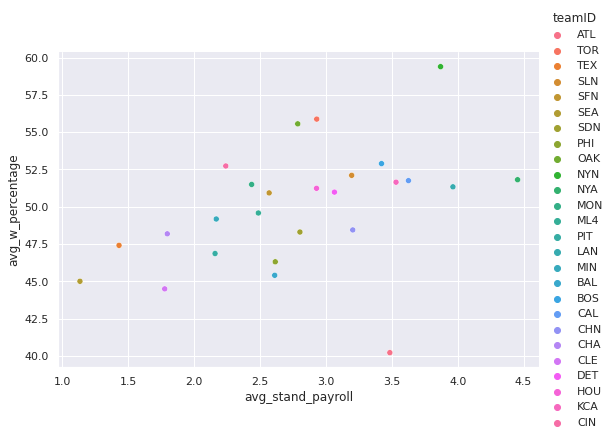

In [196]:
# Correlation between avg standardized payroll and avg win percentage for the years 1985 - 1990
func2('(1984.971, 1990.8]')

,teamID,avg_stand_payroll,avg_w_percentage
0,NYA,3.803611,53.046919
1,NYN,2.851541,44.851113
2,OAK,3.064744,48.749865
3,PHI,2.254534,47.910963
4,PIT,1.846626,49.646686
5,SEA,2.311733,48.730969
6,SFN,3.117115,48.441694
7,SLN,2.369349,50.092452
8,TEX,2.574977,50.884011
9,MON,0.766331,53.423066


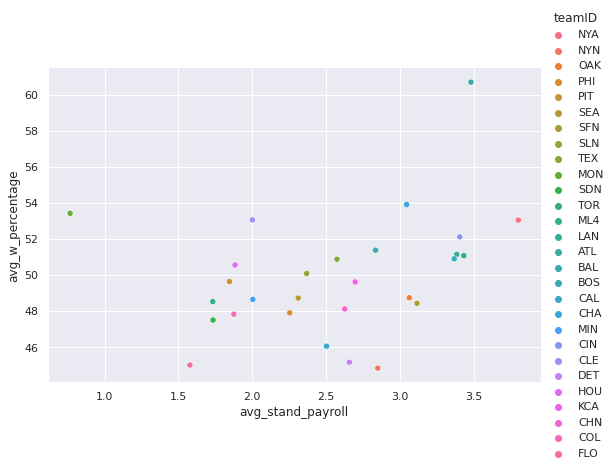

In [197]:
# Correlation between avg standardized payroll and avg win percentage for the years 1990 - 1996
func2('(1990.8, 1996.6]')

,teamID,avg_stand_payroll,avg_w_percentage
0,PHI,1.195860,46.450298
1,MON,0.283492,44.135802
2,NYA,3.625992,61.190348
3,NYN,2.546094,53.896167
4,OAK,0.508002,53.761854
5,PIT,0.425455,44.188103
6,ML4,0.844416,48.447205
7,SEA,2.112291,56.118524
8,SFN,1.712851,56.219546
9,TOR,1.962862,50.253099


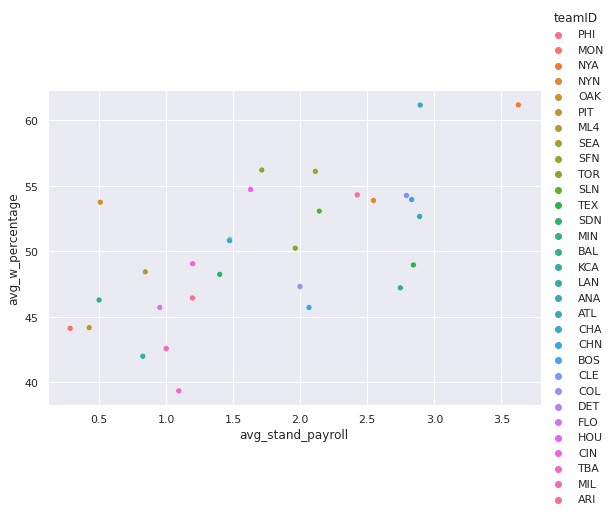

In [198]:
# Correlation between avg standardized payroll and avg win percentage for the years 1996 - 2002
func2('(1996.6, 2002.4]')

,teamID,avg_stand_payroll,avg_w_percentage
0,PHI,1.731802,54.115226
1,MON,0.576737,46.296296
2,NYA,4.810071,59.298392
3,NYN,2.434068,50.865220
4,OAK,0.824884,53.442988
5,PIT,0.343743,42.844363
6,MIN,0.836857,54.265445
7,SEA,1.904526,46.502058
8,SFN,1.640037,50.009585
9,SLN,1.758889,55.299951


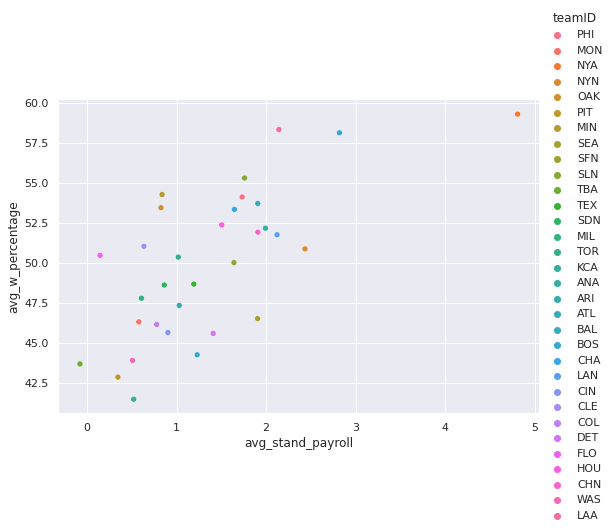

In [199]:
# Correlation between avg standardized payroll and avg win percentage for the years 2002 - 2008
func2('(2002.4, 2008.2]')

,teamID,avg_stand_payroll,avg_w_percentage
0,PIT,0.429925,46.541676
1,NYA,4.209272,57.510288
2,NYN,1.554904,46.604938
3,OAK,0.564336,52.263374
4,PHI,2.979893,53.395062
5,SDN,0.338348,47.839506
6,WAS,1.094873,50.256882
7,SFN,1.447719,53.909465
8,SLN,1.572964,55.761317
9,TBA,0.556295,54.468681


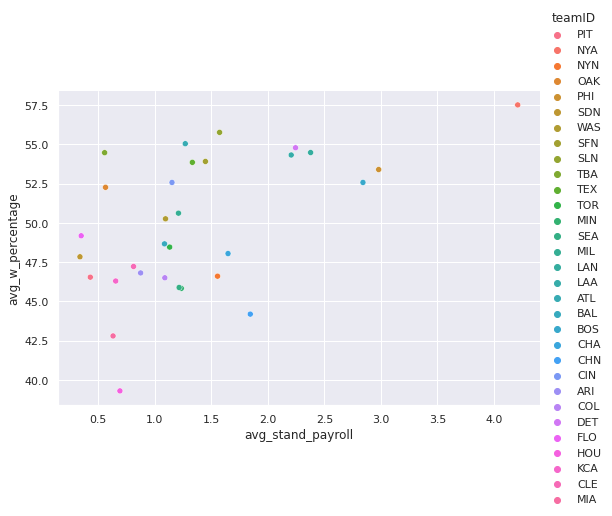

In [200]:
# Correlation between avg standardized payroll and avg win percentage for the years 2008 - 2014
func2('(2008.2, 2014.0]')

In [201]:
# Part 3 Question 3 
# The benefit of the standardized variable is it simplifies the units for the graph 
# It's much easier to make observations on the standardized payroll graph
# The points in the two graphs appear to be in the same location so the standardization of the payroll variable 
# created a graph that's easier to interpret. 
# I had an issue on the part 4 graph determining who the max was but on the standardized graph it's clearly NYA
# with a value of 4.4..
# It's also  easier to determine things like who is spending x times as much or less with standardized values. 

<AxesSubplot:xlabel='stand_payroll', ylabel='W_percentage'>

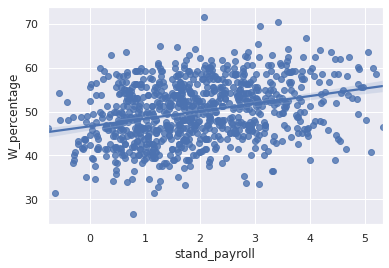

In [202]:
# Part 3 Problem 7
# x = standard payroll and y = win percentage for all teams i in year j 
# regression line to show the relationship
sns.set_theme()
sns.regplot(
    data=new_df2,
    x="stand_payroll", y="W_percentage"
)

In [203]:
exp_w_lst = []
for items in new_df2['stand_payroll']:
    value = 50 + 2.5 * items
    exp_w_lst.append(value)
new_df2['exp_w_pct'] = exp_w_lst


In [204]:
# Part 3 Problem 8
# Creates a new field to compute each team's spending effiency
w_lst = new_df2['W_percentage'].tolist()
eff_lst = []
count = 0
for items in new_df2['exp_w_pct']:
    value = w_lst[count] - items
    eff_lst.append(value)
    count += 1
new_df2['efficency'] = eff_lst
display(new_df2)

,teamID,total_payroll,yearID,W_percentage,stand_payroll,bin,exp_w_pct,efficency
0,ATL,14807000.0,1985,40.740741,5.111364,"(1984.971, 1990.8]",62.778411,-22.037670
1,TOR,8812550.0,1985,61.490683,2.637246,"(1984.971, 1990.8]",56.593115,4.897568
2,TEX,7676500.0,1985,38.509317,2.168359,"(1984.971, 1990.8]",55.420897,-16.911580
3,SLN,11817083.0,1985,62.345679,3.877321,"(1984.971, 1990.8]",59.693304,2.652375
4,SFN,8221714.0,1985,38.271605,2.393388,"(1984.971, 1990.8]",55.983469,-17.711864
5,SEA,4613000.0,1985,45.679012,0.903946,"(1984.971, 1990.8]",52.259864,-6.580852
6,SDN,11036583.0,1985,51.234568,3.555182,"(1984.971, 1990.8]",58.887955,-7.653387
7,PHI,10124966.0,1985,46.296296,3.178926,"(1984.971, 1990.8]",57.947315,-11.651018
8,OAK,9058606.0,1985,47.530864,2.738802,"(1984.971, 1990.8]",56.847005,-9.316141
9,NYN,10834762.0,1985,60.493827,3.471883,"(1984.971, 1990.8]",58.679708,1.814119


<AxesSubplot:xlabel='yearID', ylabel='efficency'>

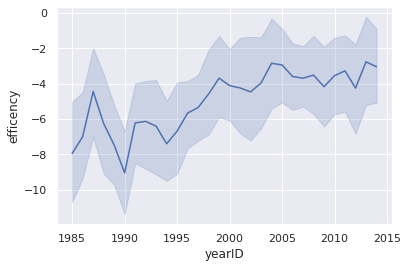

In [205]:
# Result of Part 3 Problem 8
# Line graph that shows the spending efficency of the league over time
sns.lineplot(data=new_df2, x="yearID", y="efficency")

In [206]:
# Part 3 Question 9 
# From this plot I can see the change in spending efficency over time 
# The plots created in question 2 showed me the average spending for teams accross a time period
# Question 6 further clarified the plots in question 2. I now had values that could clearly show me
# some teams were spending x times as much as others 
# The line plot created above now shows the overall view of the spending efficency over time
# For example i can see, there was a big jump in efficency then a sharp drop, 
# I see it was from 1985- 1990. 
# I know i created a graph that discretized the data into five time periods. I can go back and look at the 85-90 period
# to see what causes such a dramatic change in efficency by looking at the relationship of teams win percentage to avg payroll 

In [207]:
# This function creates a graph that plots the spending efficency of a specific team from 1985 to 2014
# The argument is the team id
def func4(team_id):
    year_lst = new_df2['yearID'].tolist()
    eff_lst = new_df2['efficency'].tolist()
    new_year_lst = []
    new_eff_lst = []
    count = 0
    for item in new_df2['teamID']:
        if item == team_id:
            new_year_lst.append(year_lst[count])
            new_eff_lst.append(eff_lst[count])
        count += 1
    new_df4 = pd.DataFrame(data=new_year_lst, columns={'yearID'})
    new_df4['efficency'] = new_eff_lst 
    sns.relplot(
        data=new_df4,
        x='yearID', y="efficency"
    )


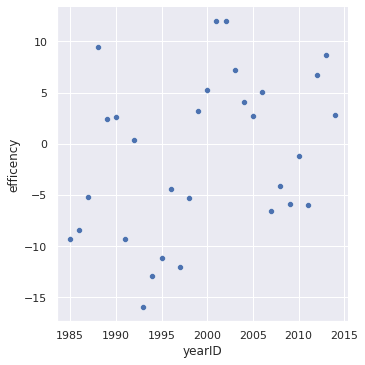

In [208]:
# The spending efficency for OAK overtime
func4('OAK')

In [209]:
# The moneyball movie took place during 2002 according to wiki.
# The graph above shows the spending efficency of OAK.
# The point where OAK was spending most efficently according to the graph was 2002
# Looking at the league efficency graph OAK was spending much more efficenctly than the rest of the league

In [ ]:
# End